In [31]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 103.3 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 44.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support,r2_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

In [35]:
df= pd.read_csv("adult.data",sep=' ',names= ['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
            'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','high_income'])

In [36]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,"27,","Private,","257302,","Assoc-acdm,","12,","Married-civ-spouse,","Tech-support,","Wife,","White,","Female,","0,","0,","38,","United-States,",<=50K
32557,"40,","Private,","154374,","HS-grad,","9,","Married-civ-spouse,","Machine-op-inspct,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K
32558,"58,","Private,","151910,","HS-grad,","9,","Widowed,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","40,","United-States,",<=50K
32559,"22,","Private,","201490,","HS-grad,","9,","Never-married,","Adm-clerical,","Own-child,","White,","Male,","0,","0,","20,","United-States,",<=50K


In [37]:
df_train=df.drop("high_income",axis=1)
output_col=pd.DataFrame(df['high_income'])

In [38]:
output_col

,high_income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [39]:
label_mapper={'<=50K':0,'>50K':1}
output_col['high_income']=output_col['high_income'].map(label_mapper)


In [40]:
output_col


,high_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


## Cleaning the Dataset

In [41]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,"
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,"
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,"
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,"
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,"27,","Private,","257302,","Assoc-acdm,","12,","Married-civ-spouse,","Tech-support,","Wife,","White,","Female,","0,","0,","38,","United-States,"
32557,"40,","Private,","154374,","HS-grad,","9,","Married-civ-spouse,","Machine-op-inspct,","Husband,","White,","Male,","0,","0,","40,","United-States,"
32558,"58,","Private,","151910,","HS-grad,","9,","Widowed,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","40,","United-States,"
32559,"22,","Private,","201490,","HS-grad,","9,","Never-married,","Adm-clerical,","Own-child,","White,","Male,","0,","0,","20,","United-States,"


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  32561 non-null  object
dtypes: object(14)
memory usage: 3.5+ MB


In [43]:
for col in df_train.columns:
    has_comma=False
    for val in df_train[col]:
        if "," in val:
            has_comma=True
            break
    print(col," has comma")
            

age  has comma
workclass  has comma
fnlwgt  has comma
education  has comma
education_num  has comma
marital_status  has comma
occupation  has comma
relationship  has comma
race  has comma
sex  has comma
capital_gain  has comma
capital_loss  has comma
hours_per_week  has comma
native_country  has comma


In [44]:
# Since columns has commas thats why they have become string type that is of object type. So we need to remove them.

In [45]:
def remove_extra_commas(value):
    if value.endswith(','):
        return value[:-1]  # Remove the last character (comma)
    else:
        return value  # No change if no extra comma
for col in df_train.columns:
    df_train[col] = df_train[col].apply(remove_extra_commas)


In [46]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education_num   32561 non-null  object
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  object
 11  capital_loss    32561 non-null  object
 12  hours_per_week  32561 non-null  object
 13  native_country  32561 non-null  object
dtypes: object(14)
memory usage: 3.5+ MB


Since some columns are of number types also so we will convert them.

In [48]:
update_cols=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
for col in update_cols:
    df_train[col]=df_train[col].astype("float")
    

In [49]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
dtypes: float64(6), object(8)
memory usage: 3.5+ MB


In [51]:
categorical_columns=df_train.select_dtypes(exclude=np.number).columns
numerical_columns=df_train.select_dtypes(include=np.number).columns
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [52]:
numerical_columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [53]:
for col in categorical_columns:
    # print(df_train[col].value_counts())
    print(col)
    categories=list(df_train[col].value_counts().index)
    for cats in categories:
        
        print(cats,"__")
    print()
    

workclass
Private __
Self-emp-not-inc __
Local-gov __
? __
State-gov __
Self-emp-inc __
Federal-gov __
Without-pay __
Never-worked __

education
HS-grad __
Some-college __
Bachelors __
Masters __
Assoc-voc __
11th __
Assoc-acdm __
10th __
7th-8th __
Prof-school __
9th __
12th __
Doctorate __
5th-6th __
1st-4th __
Preschool __

marital_status
Married-civ-spouse __
Never-married __
Divorced __
Separated __
Widowed __
Married-spouse-absent __
Married-AF-spouse __

occupation
Prof-specialty __
Craft-repair __
Exec-managerial __
Adm-clerical __
Sales __
Other-service __
Machine-op-inspct __
? __
Transport-moving __
Handlers-cleaners __
Farming-fishing __
Tech-support __
Protective-serv __
Priv-house-serv __
Armed-Forces __

relationship
Husband __
Not-in-family __
Own-child __
Unmarried __
Wife __
Other-relative __

race
White __
Black __
Asian-Pac-Islander __
Amer-Indian-Eskimo __
Other __

sex
Male __
Female __

native_country
United-States __
Mexico __
? __
Philippines __
Germany __
Cana

In [54]:
# For the category "?" in some columns we impute them with np.nan values
for col in categorical_columns:
    if "?" in set(df_train[col].value_counts().index) :
        df_train[col]=np.where(df_train[col]=="?","Undefined",df_train[col])

In [55]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


## EDA

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
dtypes: float64(6), object(8)
memory usage: 3.5+ MB


In [57]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

<Axes: >

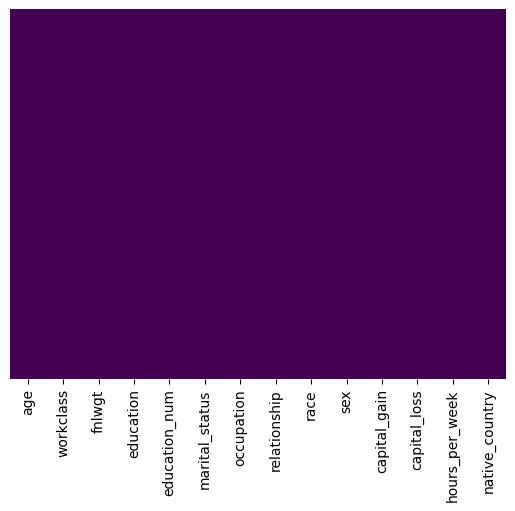

In [58]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
pd.concat([df_train,output_col],axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,0
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,1
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,0
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,0


In [60]:
pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,high_income
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,0
32557,40.0,154374.0,9.0,0.0,0.0,40.0,1
32558,58.0,151910.0,9.0,0.0,0.0,40.0,0
32559,22.0,201490.0,9.0,0.0,0.0,20.0,0


In [61]:
pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,high_income
age,1.000000,-0.078141,0.066345,0.124948,0.058484,0.142907,0.272962
fnlwgt,-0.078141,1.000000,-0.035706,-0.006039,-0.006914,-0.021621,-0.010738
education_num,0.066345,-0.035706,1.000000,0.119140,0.074749,0.167215,0.329682
capital_gain,0.124948,-0.006039,0.119140,1.000000,-0.066569,0.093322,0.278159
capital_loss,0.058484,-0.006914,0.074749,-0.066569,1.000000,0.059852,0.141042
hours_per_week,0.142907,-0.021621,0.167215,0.093322,0.059852,1.000000,0.269075
high_income,0.272962,-0.010738,0.329682,0.278159,0.141042,0.269075,1.000000


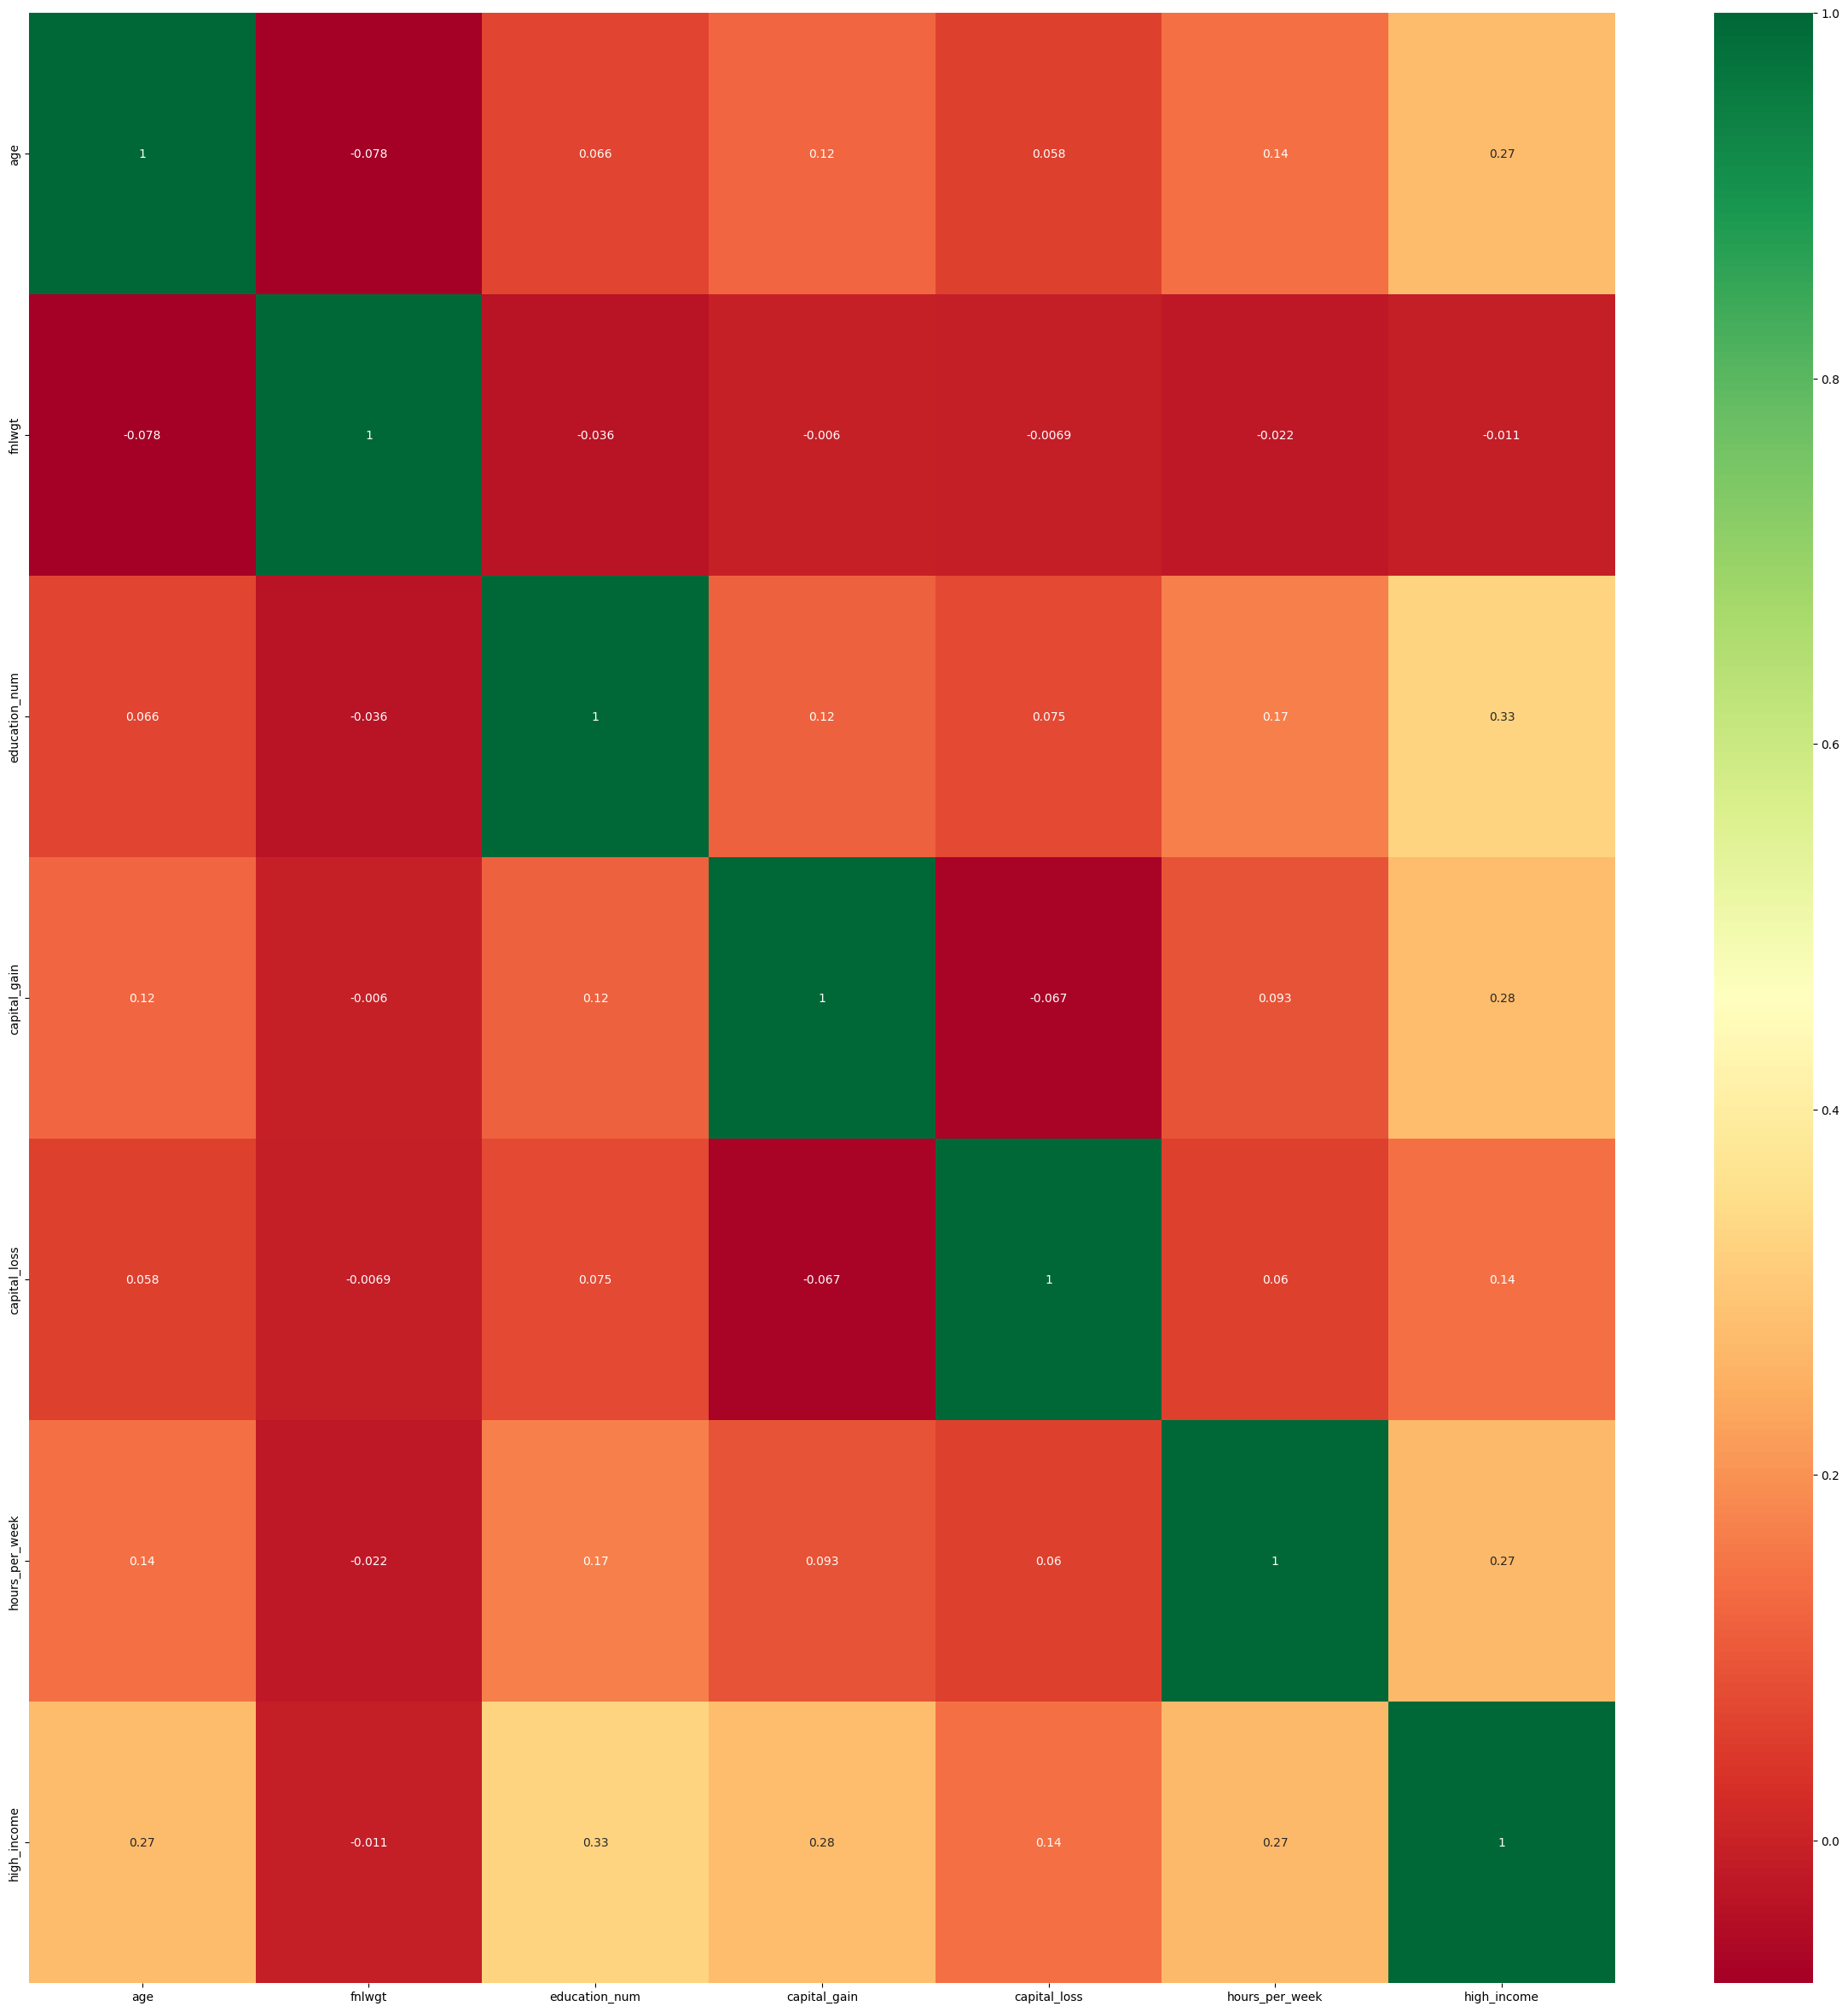

In [62]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([df_train,output_col],axis=1).select_dtypes(include=np.number).corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

In [63]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



X = df_train.select_dtypes(include=np.number)
calc_vif(X)

,Variables,VIF
0,age,7.246475
1,fnlwgt,3.683144
2,education_num,10.983289
3,capital_gain,1.032987
4,capital_loss,1.056815
5,hours_per_week,9.758094


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

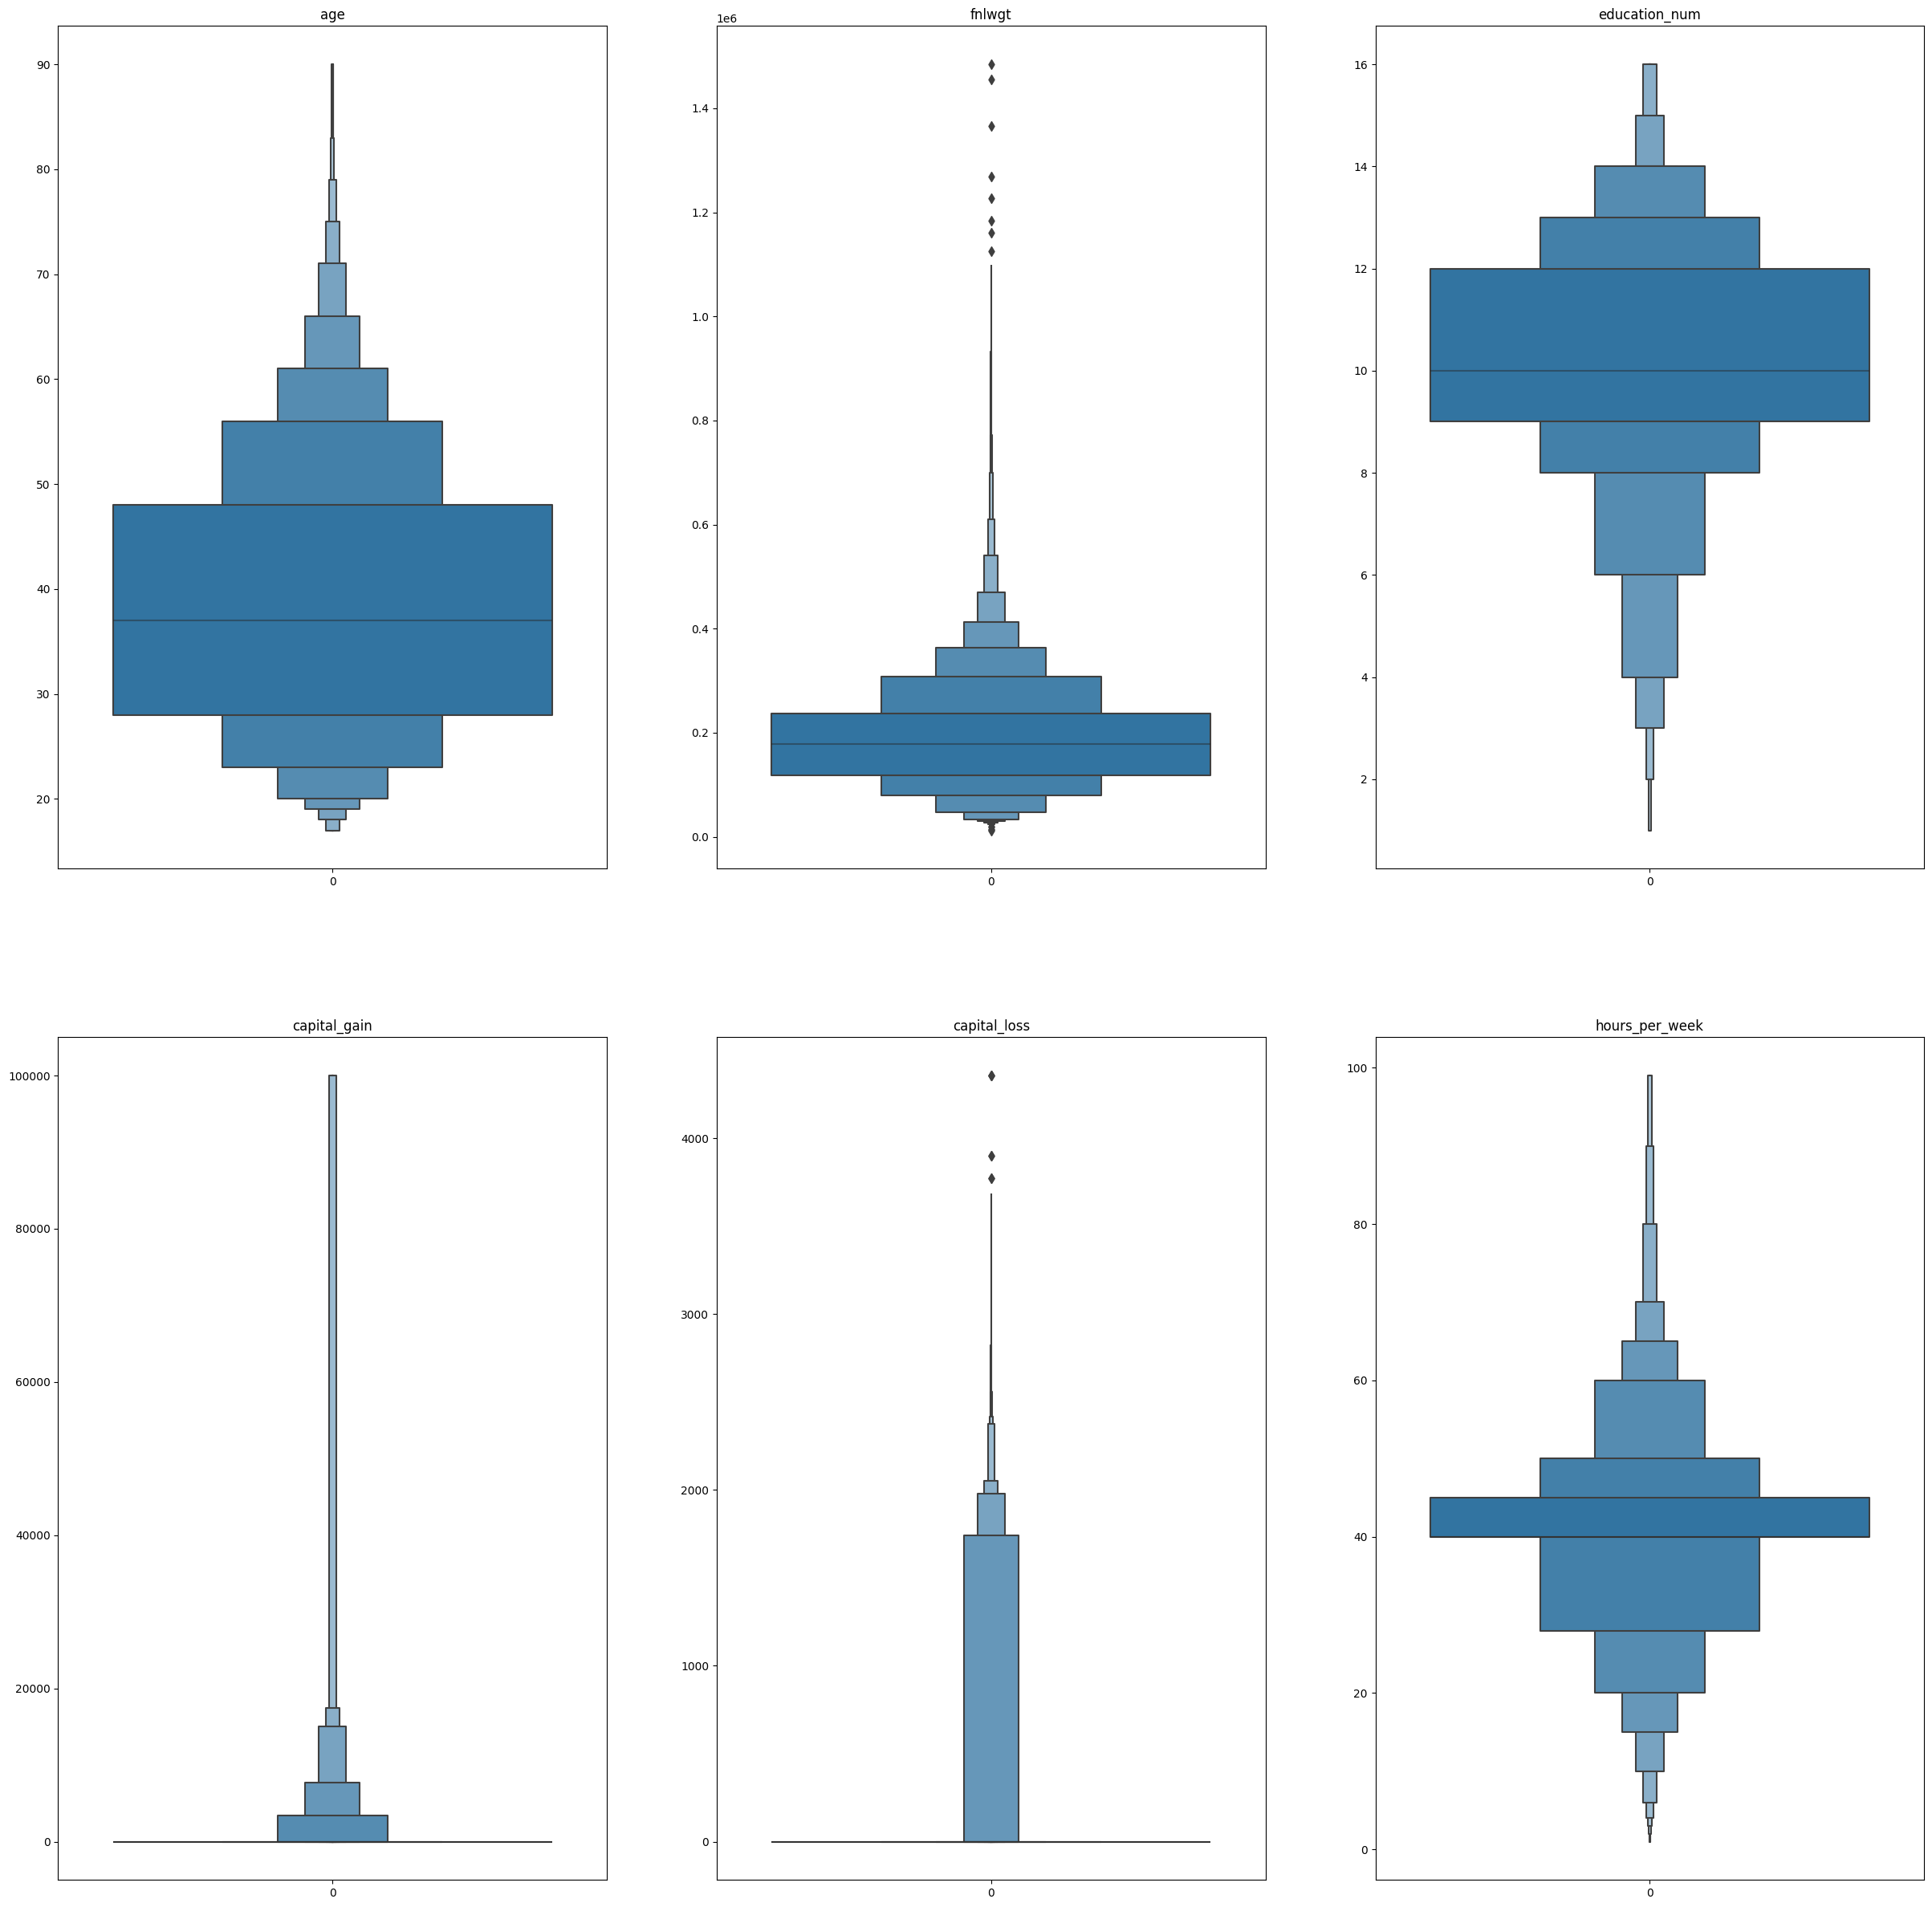

In [64]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.boxenplot(df_train[col], ax = ax)
    ax.set_title(col)

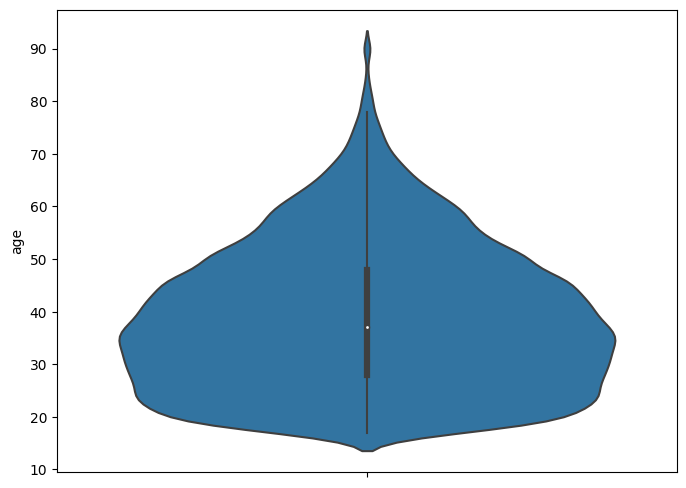

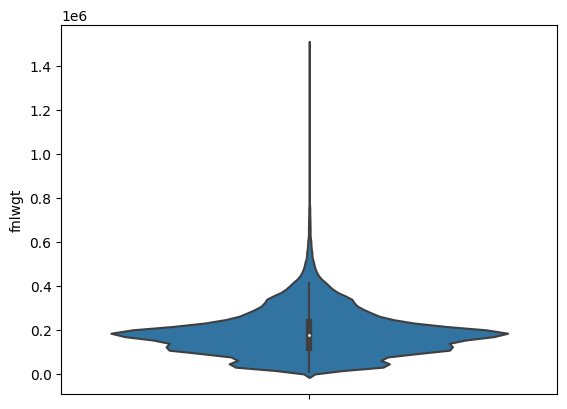

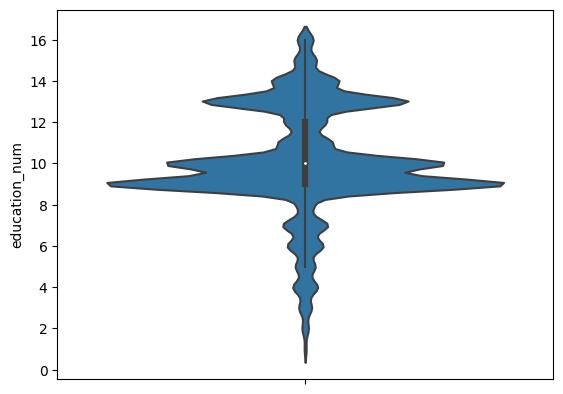

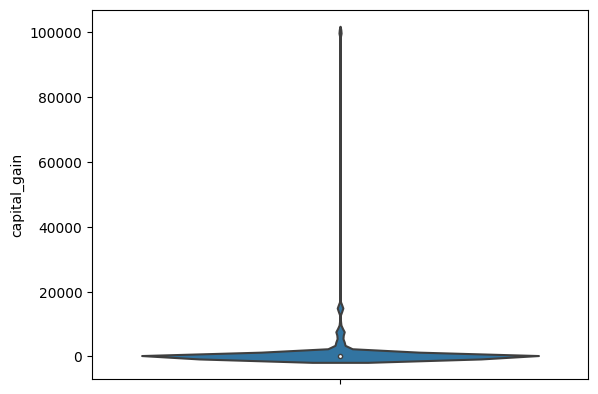

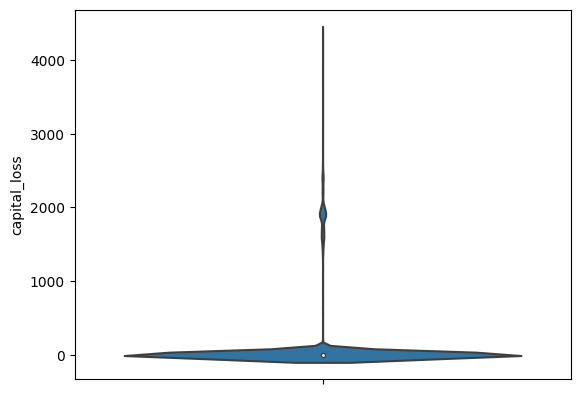

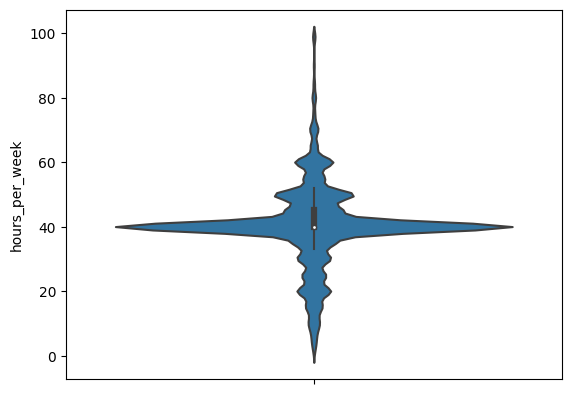

In [65]:
l=[]
for i in range(len(df_train)):
    l.append(i)
# Plot a violin plot for numerical vs categorical
plt.figure(figsize=(8, 6))
for col in numerical_columns:
    sns.violinplot(y=df_train[col])
    plt.show()


/tmp/ipykernel_78/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_78/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_78/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_78/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


/tmp/ipykernel_78/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_78/1690995412.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).


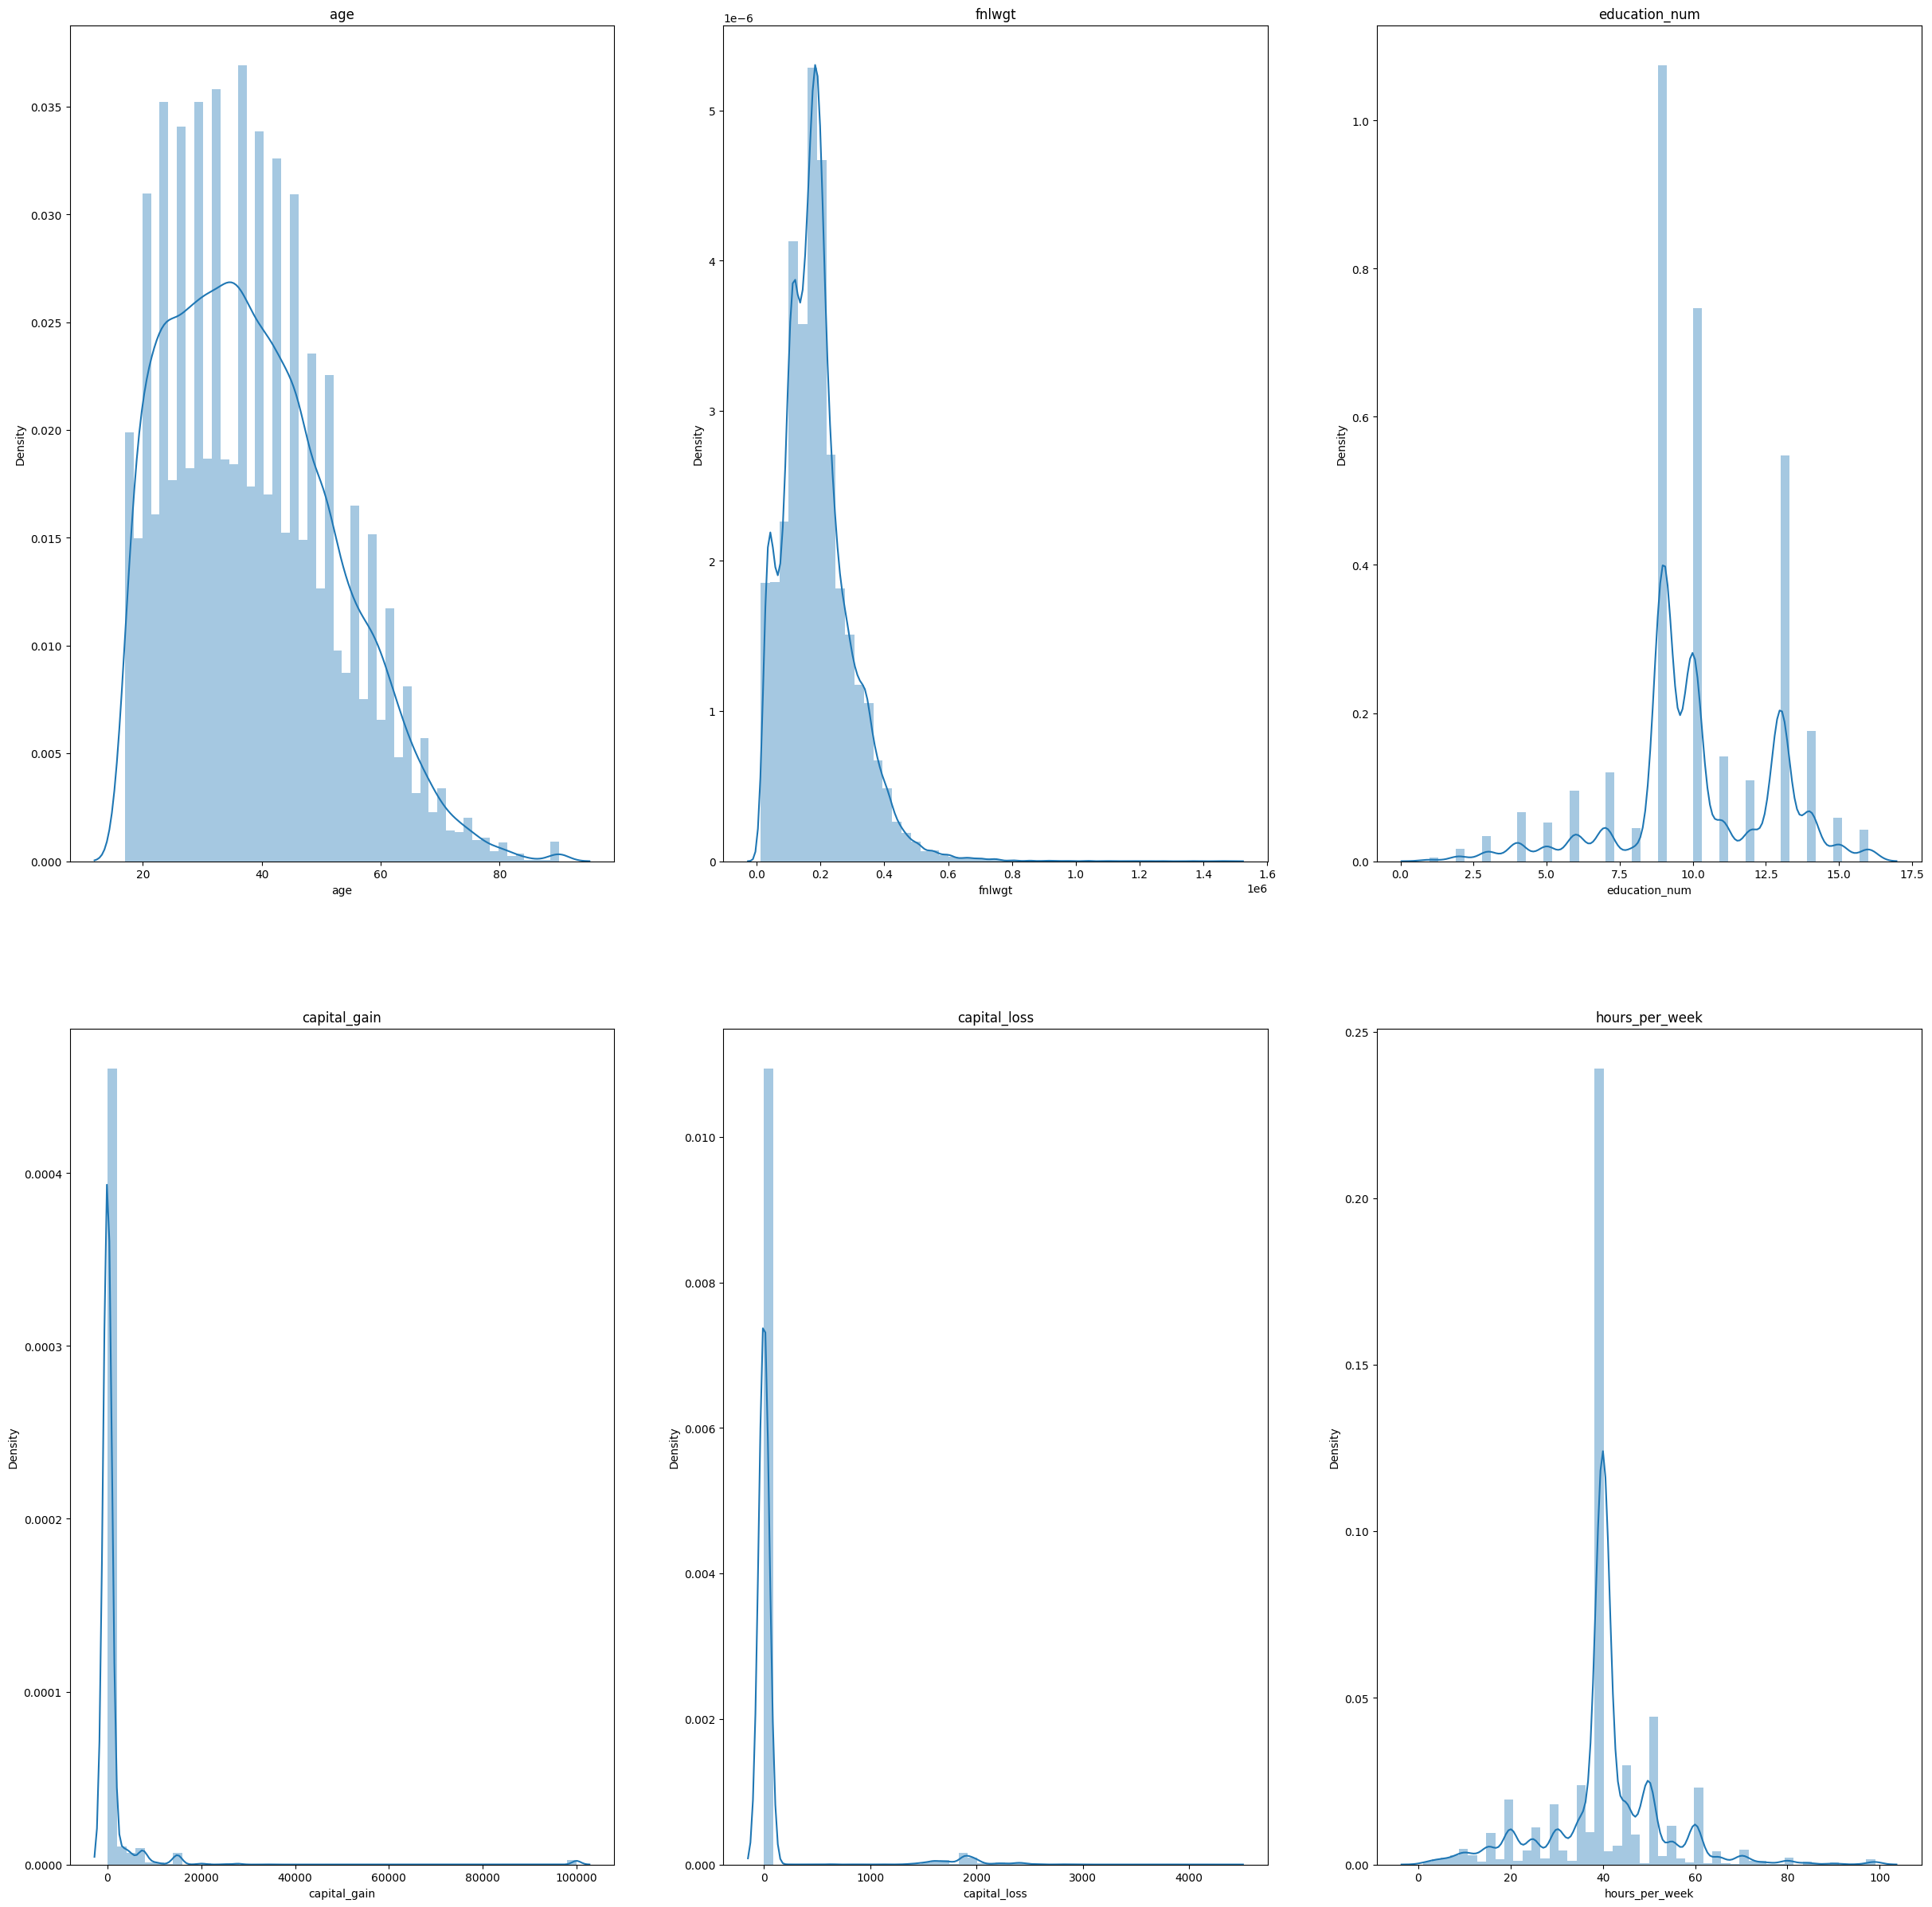

In [66]:
fig, axes = plt.subplots(nrows = 2, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)

# cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, numerical_columns):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

In [67]:
for col in numerical_columns:
    print(f" {df_train[col].skew() } in {col}")

 0.5587433694130484 in age
 1.4469800945789826 in fnlwgt
 -0.3116758679102297 in education_num
 11.953847687699799 in capital_gain
 4.594629121679692 in capital_loss
 0.22764253680450092 in hours_per_week


In [68]:
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

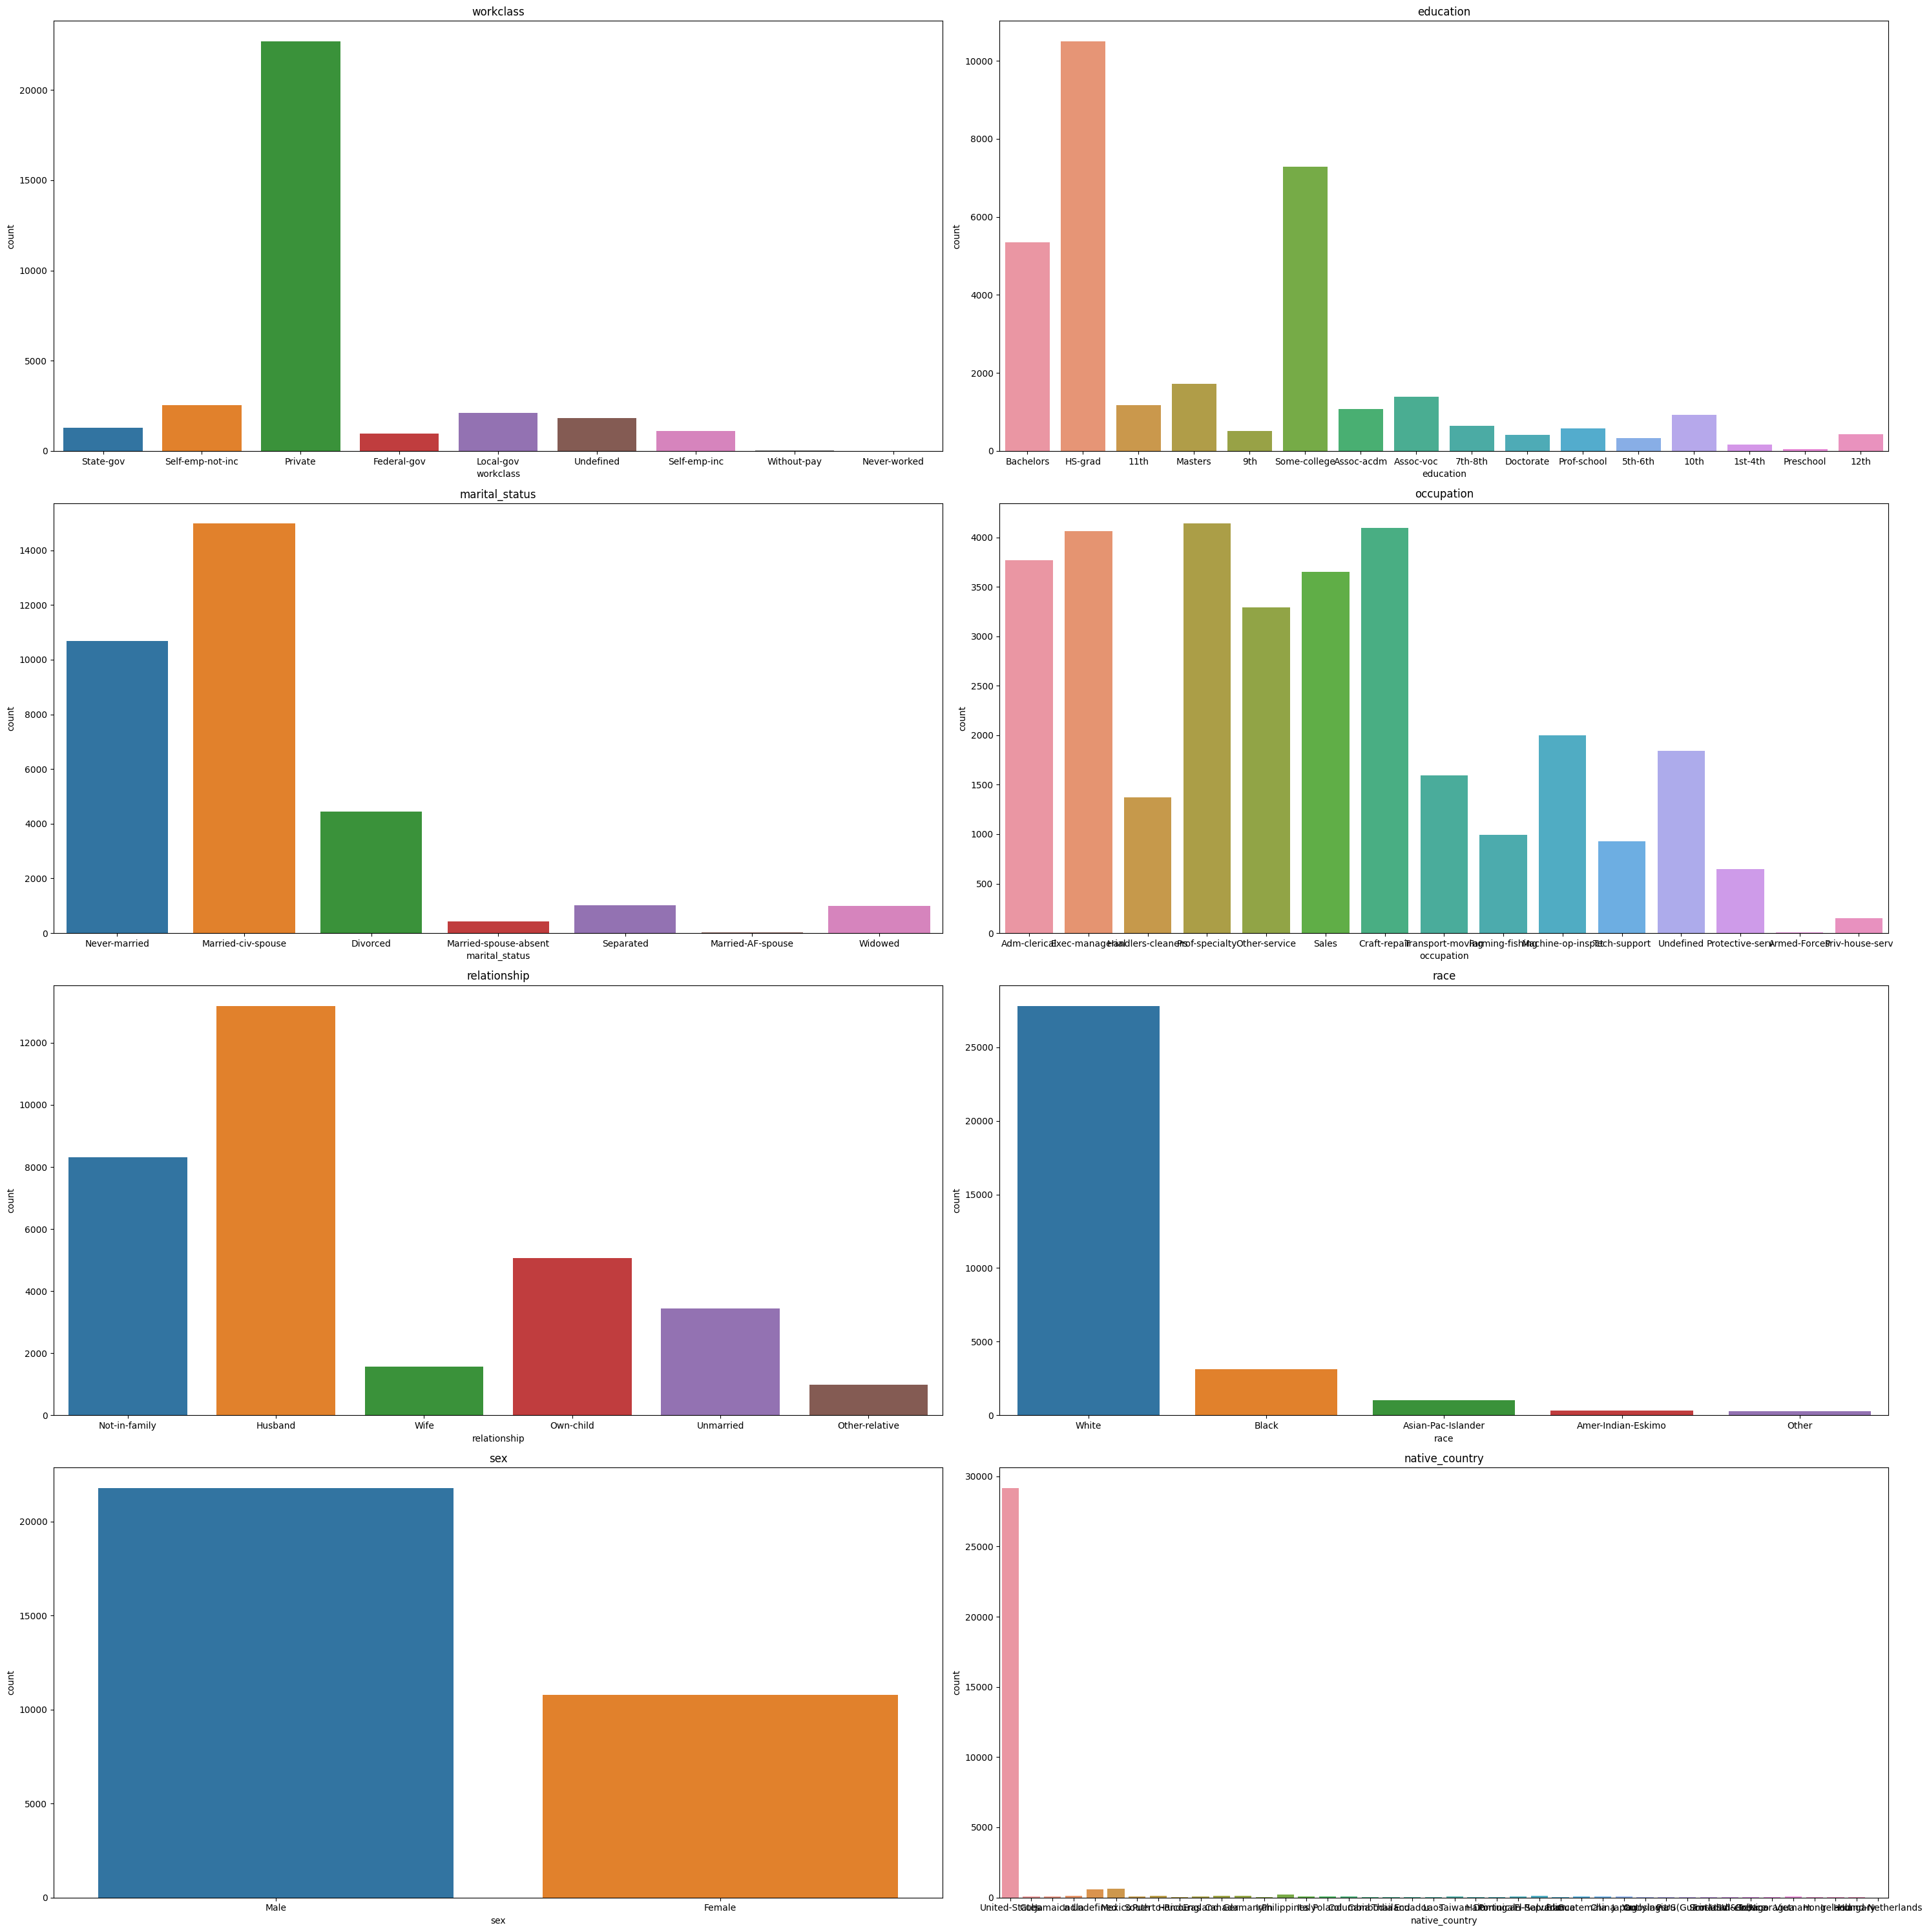

In [69]:
fig, axes = plt.subplots(nrows=4, ncols=2)  # Create subplots
axes = axes.flatten()  # Flatten the axes array to handle individual plots
fig.set_size_inches(30, 30)  # Set the figure size

for ax, col in zip(axes, categorical_columns):
    sns.countplot(x=col, data=df_train, ax=ax)  # Use x=col to specify the column
    ax.set_title(col)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Text(0.5, 1.0, 'Count of categories in the label')

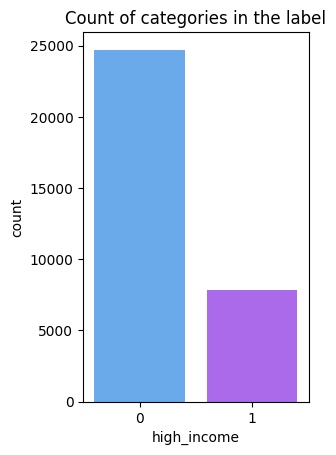

In [70]:
plt.subplot(1,2,1)
sns.countplot(x = 'high_income' , palette= 'cool', data= output_col) 
plt.title("Count of categories in the label")

In [71]:
df_train[numerical_columns].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
95%,63.000000,3.796820e+05,14.000000,5013.000000,0.000000,60.000000
97%,67.000000,4.168904e+05,15.000000,7688.000000,1848.000000,65.000000
99%,74.000000,5.100720e+05,16.000000,15024.000000,1980.000000,80.000000


## Encoding

In [55]:
def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        # print(one_hot_encoded)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train

In [56]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_columns,strategy="labelencoder")

In [57]:
df_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,39.0,77516.0,13.0,2174.0,0.0,40.0,4,2,1,3,1,0,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1,2,0,2,0,0,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,2,9,1,0,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,5,0,9,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,2,0,0,4,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0,0,6,0,11,4,0,1,0
32557,40.0,154374.0,9.0,0.0,0.0,40.0,0,0,0,6,0,0,0,0
32558,58.0,151910.0,9.0,0.0,0.0,40.0,0,0,4,3,3,0,1,0
32559,22.0,201490.0,9.0,0.0,0.0,20.0,0,0,1,3,2,0,0,0


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education_num   32561 non-null  float64
 3   capital_gain    32561 non-null  float64
 4   capital_loss    32561 non-null  float64
 5   hours_per_week  32561 non-null  float64
 6   workclass       32561 non-null  int64  
 7   education       32561 non-null  int64  
 8   marital_status  32561 non-null  int64  
 9   occupation      32561 non-null  int64  
 10  relationship    32561 non-null  int64  
 11  race            32561 non-null  int64  
 12  sex             32561 non-null  int64  
 13  native_country  32561 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 3.5 MB


In [59]:
X=df_train
Y=output_col

In [63]:

    
avg_accuracies=defaultdict(list)
highest_accuracies=defaultdict(list)
algorithms_to_be_tested=["LogisticRegression()","DecisionTreeClassifier()","KNeighborsClassifier()","RandomForestClassifier()","SGDClassifier()","RidgeClassifierCV()","GaussianNB()"]
for al in algorithms_to_be_tested:
    avg_accuracies[al].append(0)# Accuracy
    avg_accuracies[al].append(0)# Precisoion
    avg_accuracies[al].append(0)# Recall
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))
    highest_accuracies[al].append(float('-inf'))

In [64]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0, 0, 0],
             'DecisionTreeClassifier()': [0, 0, 0],
             'SVC()': [0, 0, 0],
             'KNeighborsClassifier()': [0, 0, 0],
             'RandomForestClassifier()': [0, 0, 0],
             'SGDClassifier()': [0, 0, 0],
             'RidgeClassifierCV()': [0, 0, 0],
             'GaussianNB()': [0, 0, 0]})

In [65]:
highest_accuracies

defaultdict(list,
            {'LogisticRegression()': [-inf, -inf, -inf],
             'DecisionTreeClassifier()': [-inf, -inf, -inf],
             'SVC()': [-inf, -inf, -inf],
             'KNeighborsClassifier()': [-inf, -inf, -inf],
             'RandomForestClassifier()': [-inf, -inf, -inf],
             'SGDClassifier()': [-inf, -inf, -inf],
             'RidgeClassifierCV()': [-inf, -inf, -inf],
             'GaussianNB()': [-inf, -inf, -inf]})

In [66]:
def algo_testing(algo:str,test_size:float,X,Y,evaluation_metric:str,random_state,shuffle,iteration_number):
    model=eval(algo)
    evaluation_metric=eval(evaluation_metric)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=random_state,shuffle=shuffle)
   
    model.fit(X_train,Y_train)
    predicted=model.predict(X_test)
    
    accuracy=evaluation_metric(y_true=Y_test, y_pred=predicted)
    precision,recall,fbeta_score,support=precision_recall_fscore_support(y_true=Y_test,y_pred=predicted,labels=[0,1])
    
    print(f"Training accuracy of {model} at iteration number {iteration_number} is ", model.score(X_train,Y_train))
    print(f"Testing accuracy of {model} at iteration number {iteration_number} is ",accuracy)
    
    if accuracy>highest_accuracies[algo][0]:
        
        highest_accuracies[algo][0]=accuracy
        
        highest_accuracies[algo][1]=precision
        highest_accuracies[algo][2]=recall
        print(f"New_highest is reached at iteration number {iteration_number} ",'\n',accuracy,precision,recall)
    avg_accuracies[algo][0]+=accuracy
    avg_accuracies[algo][1]+=precision
    avg_accuracies[algo][2]+=recall
    
    
    
    
    

In [67]:
for algo in algorithms_to_be_tested:
    for i in range(50):
        algo_testing(algo=algo,test_size=0.2,X=X,Y=Y,evaluation_metric="accuracy_score",random_state=42,shuffle=True,iteration_number=i+1)
    avg_accuracies[algo][0]/=50
    avg_accuracies[algo][1]/=50
    avg_accuracies[algo][2]/=50

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 1 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 1 is  0.8000921234454169
New_highest is reached at iteration number 1  
 0.8000921234454169 [0.80660377 0.73310225] [0.96883853 0.26925525]
Training accuracy of LogisticRegression() at iteration number 2 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 2 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 3 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 3 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 4 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 4 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 5 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 5 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 6 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 6 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 7 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 7 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 8 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 8 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 9 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 9 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 10 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 10 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 11 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 11 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 12 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 12 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 13 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 13 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 14 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 14 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 15 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 15 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 16 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 16 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 17 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 17 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 18 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 18 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 19 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 19 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 20 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 20 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 21 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 21 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 22 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 22 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 23 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 23 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 24 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 24 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 25 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 25 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 26 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 26 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 27 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 27 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 28 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 28 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 29 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 29 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 30 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 30 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 31 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 31 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 32 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 32 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 33 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 33 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 34 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 34 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 35 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 35 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 36 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 36 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 37 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 37 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 38 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 38 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 39 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 39 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 40 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 40 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 41 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 41 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 42 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 42 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 43 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 43 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 44 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 44 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 45 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 45 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 46 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 46 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 47 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 47 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 48 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 48 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of LogisticRegression() at iteration number 49 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 49 is  0.8000921234454169
Training accuracy of LogisticRegression() at iteration number 50 is  0.7975660319410319
Testing accuracy of LogisticRegression() at iteration number 50 is  0.8000921234454169


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of DecisionTreeClassifier() at iteration number 1 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 1 is  0.8189774297558728
New_highest is reached at iteration number 1  
 0.8189774297558728 [0.88405797 0.62143742] [0.87636584 0.63844685]
Training accuracy of DecisionTreeClassifier() at iteration number 2 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 2 is  0.816981421771841
Training accuracy of DecisionTreeClassifier() at iteration number 3 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 3 is  0.8174420389989252
Training accuracy of DecisionTreeClassifier() at iteration number 4 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 4 is  0.8177491171503147
Training accuracy of DecisionTreeClassifier() at iteration number 5 is  1.0
Testing accuracy of DecisionTreeClassifier() at iteration number 5 is  0.8166743436204514
Training accuracy of DecisionTreeClassifier() at iterati

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 1 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 1 is  0.7957930293259634
New_highest is reached at iteration number 1  
 0.7957930293259634 [0.78831418 0.98393574] [0.99919061 0.15595162]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 2 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 2 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 3 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 3 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 4 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 4 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 5 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 5 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 6 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 6 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 7 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 7 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 8 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 8 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 9 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 9 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 10 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 10 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 11 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 11 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 12 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 12 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 13 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 13 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 14 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 14 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 15 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 15 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 16 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 16 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 17 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 17 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 18 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 18 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 19 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 19 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 20 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 20 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 21 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 21 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 22 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 22 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 23 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 23 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 24 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 24 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 25 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 25 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 26 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 26 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 27 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 27 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 28 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 28 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 29 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 29 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 30 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 30 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 31 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 31 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 32 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 32 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 33 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 33 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 34 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 34 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 35 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 35 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 36 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 36 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 37 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 37 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 38 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 38 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 39 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 39 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 40 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 40 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 41 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 41 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 42 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 42 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 43 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 43 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 44 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 44 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 45 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 45 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 46 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 46 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 47 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 47 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 48 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 48 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 49 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 49 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SVC() at iteration number 50 is  0.7952242014742015
Testing accuracy of SVC() at iteration number 50 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 1 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 1 is  0.7799785045294028
New_highest is reached at iteration number 1  
 0.7799785045294028 [0.81246661 0.57683742] [0.92310805 0.32972629]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 2 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 2 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 3 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 3 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 4 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 4 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 5 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 5 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 6 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 6 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 7 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 7 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 8 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 8 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 9 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 9 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 10 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 10 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 11 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 11 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 12 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 12 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 13 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 13 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 14 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 14 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 15 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 15 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 16 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 16 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 17 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 17 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 18 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 18 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 19 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 19 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 20 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 20 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 21 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 21 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 22 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 22 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 23 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 23 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 24 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 24 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 25 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 25 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 26 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 26 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 27 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 27 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 28 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 28 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 29 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 29 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 30 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 30 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 31 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 31 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 32 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 32 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 33 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 33 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 34 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 34 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 35 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 35 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 36 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 36 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 37 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 37 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 38 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 38 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 39 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 39 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 40 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 40 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 41 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 41 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 42 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 42 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 43 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 43 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 44 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 44 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 45 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 45 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 46 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 46 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 47 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 47 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 48 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 48 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 49 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 49 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy of KNeighborsClassifier() at iteration number 50 is  0.8329238329238329
Testing accuracy of KNeighborsClassifier() at iteration number 50 is  0.7799785045294028


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 1 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 1 is  0.8635037617073545
New_highest is reached at iteration number 1  
 0.8635037617073545 [0.89114071 0.75600601] [0.93423715 0.640993  ]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 2 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 2 is  0.8618148318747121


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 3 is  0.9999232186732187
Testing accuracy of RandomForestClassifier() at iteration number 3 is  0.8616612927990174


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 4 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 4 is  0.8598188238906802


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 5 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 5 is  0.8588975894365116


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 6 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 6 is  0.8613542146476278


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 7 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 7 is  0.8596652848149854


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 8 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 8 is  0.8602794411177644


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 9 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 9 is  0.8608935974205435


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 10 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 10 is  0.8622754491017964


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 11 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 11 is  0.8621219100261016


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 12 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 12 is  0.8622754491017964


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 13 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 13 is  0.8633502226316597


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 14 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 14 is  0.863196683555965


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 15 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 15 is  0.8576692768309535


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 16 is  0.9999232186732187
Testing accuracy of RandomForestClassifier() at iteration number 16 is  0.863196683555965


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 17 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 17 is  0.8610471364962383


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 18 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 18 is  0.863196683555965


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 19 is  0.9999232186732187
Testing accuracy of RandomForestClassifier() at iteration number 19 is  0.860586519269154


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 20 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 20 is  0.8615077537233226


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 21 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 21 is  0.8590511285122063


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 22 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 22 is  0.8598188238906802


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 23 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 23 is  0.8618148318747121


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 24 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 24 is  0.8581298940580377


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 25 is  0.999884828009828
Testing accuracy of RandomForestClassifier() at iteration number 25 is  0.861200675571933


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 26 is  0.9999232186732187
Testing accuracy of RandomForestClassifier() at iteration number 26 is  0.8622754491017964


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 27 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 27 is  0.8607400583448488


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 28 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 28 is  0.861200675571933


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 29 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 29 is  0.8639643789344388
New_highest is reached at iteration number 29  
 0.8639643789344388 [0.89180835 0.75617053] [0.9340348  0.64353915]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 30 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 30 is  0.8622754491017964


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 31 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 31 is  0.8613542146476278


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 32 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 32 is  0.8616612927990174


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 33 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 33 is  0.8618148318747121


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 34 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 34 is  0.8628896054045755


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 35 is  0.9999232186732187
Testing accuracy of RandomForestClassifier() at iteration number 35 is  0.8613542146476278


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 36 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 36 is  0.8615077537233226


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 37 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 37 is  0.8630431444802702


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 38 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 38 is  0.8598188238906802


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 39 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 39 is  0.8607400583448488


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 40 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 40 is  0.8608935974205435


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 41 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 41 is  0.8613542146476278


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 42 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 42 is  0.860586519269154


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 43 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 43 is  0.8621219100261016


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 44 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 44 is  0.861200675571933


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 45 is  1.0
Testing accuracy of RandomForestClassifier() at iteration number 45 is  0.8599723629663749


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 46 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 46 is  0.861200675571933


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 47 is  0.999884828009828
Testing accuracy of RandomForestClassifier() at iteration number 47 is  0.8638108398587441


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 48 is  0.999884828009828
Testing accuracy of RandomForestClassifier() at iteration number 48 is  0.8619683709504069


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 49 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 49 is  0.860586519269154


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy of RandomForestClassifier() at iteration number 50 is  0.9999616093366094
Testing accuracy of RandomForestClassifier() at iteration number 50 is  0.8622754491017964


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 1 is  0.7934966216216216
Testing accuracy of SGDClassifier() at iteration number 1 is  0.7942576385690158
New_highest is reached at iteration number 1  
 0.7942576385690158 [0.79418491 0.79539642] [0.98381222 0.19796308]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 2 is  0.7842828624078624
Testing accuracy of SGDClassifier() at iteration number 2 is  0.7851988331030247


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 3 is  0.7797911547911548
Testing accuracy of SGDClassifier() at iteration number 3 is  0.7807461999078765


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 4 is  0.7856265356265356
Testing accuracy of SGDClassifier() at iteration number 4 is  0.7885766927683096


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 5 is  0.7936501842751843
Testing accuracy of SGDClassifier() at iteration number 5 is  0.7968678028558268
New_highest is reached at iteration number 5  
 0.7968678028558268 [0.80612418 0.70598007] [0.96418454 0.27052833]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 6 is  0.7915003071253072
Testing accuracy of SGDClassifier() at iteration number 6 is  0.7907262398280362


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 7 is  0.7814803439803439
Testing accuracy of SGDClassifier() at iteration number 7 is  0.782435129740519


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 8 is  0.7914619164619164
Testing accuracy of SGDClassifier() at iteration number 8 is  0.790879778903731


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 9 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 9 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 10 is  0.7865095208845209
Testing accuracy of SGDClassifier() at iteration number 10 is  0.78826961461692


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 11 is  0.781710687960688
Testing accuracy of SGDClassifier() at iteration number 11 is  0.7822815906648242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 12 is  0.7794840294840295
Testing accuracy of SGDClassifier() at iteration number 12 is  0.7833563641946876


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 13 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 13 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 14 is  0.7899646805896806
Testing accuracy of SGDClassifier() at iteration number 14 is  0.7924151696606786


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 15 is  0.7934198402948403
Testing accuracy of SGDClassifier() at iteration number 15 is  0.7957930293259634


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 16 is  0.7917306511056511
Testing accuracy of SGDClassifier() at iteration number 16 is  0.79149393520651


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 17 is  0.7865863022113022
Testing accuracy of SGDClassifier() at iteration number 17 is  0.7885766927683096


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 18 is  0.7938805282555282
Testing accuracy of SGDClassifier() at iteration number 18 is  0.7961001074773529


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 19 is  0.7801750614250614
Testing accuracy of SGDClassifier() at iteration number 19 is  0.7847382158759404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 20 is  0.7818642506142506
Testing accuracy of SGDClassifier() at iteration number 20 is  0.7822815906648242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 21 is  0.7835150491400491
Testing accuracy of SGDClassifier() at iteration number 21 is  0.7878089973898357


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 22 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 22 is  0.24120988791647474


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 23 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 23 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 24 is  0.7740325552825553
Testing accuracy of SGDClassifier() at iteration number 24 is  0.7735298633502227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 25 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 25 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 26 is  0.7878531941031941
Testing accuracy of SGDClassifier() at iteration number 26 is  0.7896514662981728


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 27 is  0.7856265356265356
Testing accuracy of SGDClassifier() at iteration number 27 is  0.7885766927683096


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 28 is  0.7943796068796068
Testing accuracy of SGDClassifier() at iteration number 28 is  0.7959465684016582


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 29 is  0.7819410319410319
Testing accuracy of SGDClassifier() at iteration number 29 is  0.782435129740519


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 30 is  0.7833230958230958
Testing accuracy of SGDClassifier() at iteration number 30 is  0.7875019192384461


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 31 is  0.7902718058968059
Testing accuracy of SGDClassifier() at iteration number 31 is  0.7930293259634577


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 32 is  0.7780251842751843
Testing accuracy of SGDClassifier() at iteration number 32 is  0.782435129740519


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 33 is  0.7835534398034398
Testing accuracy of SGDClassifier() at iteration number 33 is  0.7845846768002457


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 34 is  0.7828624078624079
Testing accuracy of SGDClassifier() at iteration number 34 is  0.7836634423460771


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 35 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 35 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 36 is  0.7942260442260443
Testing accuracy of SGDClassifier() at iteration number 36 is  0.7964071856287425


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 37 is  0.7921145577395577
Testing accuracy of SGDClassifier() at iteration number 37 is  0.7927222478120681


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 38 is  0.7814035626535627
Testing accuracy of SGDClassifier() at iteration number 38 is  0.7822815906648242


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 39 is  0.7941108722358723
Testing accuracy of SGDClassifier() at iteration number 39 is  0.7945647167204053


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 40 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 40 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 41 is  0.792652027027027
Testing accuracy of SGDClassifier() at iteration number 41 is  0.7953324120988792


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 42 is  0.7910780098280098
Testing accuracy of SGDClassifier() at iteration number 42 is  0.7939505604176262


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 43 is  0.24070945945945946
Testing accuracy of SGDClassifier() at iteration number 43 is  0.24120988791647474
Training accuracy of SGDClassifier() at iteration number 44 is  0.7824785012285013
Testing accuracy of SGDClassifier() at iteration number 44 is  0.7864271457085829


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 45 is  0.7886210073710074
Testing accuracy of SGDClassifier() at iteration number 45 is  0.7887302318440043


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 46 is  0.7941492628992629
Testing accuracy of SGDClassifier() at iteration number 46 is  0.7965607247044373


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 47 is  0.7924984643734644
Testing accuracy of SGDClassifier() at iteration number 47 is  0.7933364041148472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 48 is  0.7919226044226044
Testing accuracy of SGDClassifier() at iteration number 48 is  0.7924151696606786


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 49 is  0.7863943488943489
Testing accuracy of SGDClassifier() at iteration number 49 is  0.7890373099953938


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of SGDClassifier() at iteration number 50 is  0.7916922604422605
Testing accuracy of SGDClassifier() at iteration number 50 is  0.79149393520651
Training accuracy of RidgeClassifierCV() at iteration number 1 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 1 is  0.8188238906801781
New_highest is reached at iteration number 1  
 0.8188238906801781 [0.82838687 0.74904459] [0.9601376 0.3742839]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 2 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 2 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 3 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 3 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 4 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 4 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 5 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 5 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 6 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 6 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 7 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 7 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 8 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 8 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 9 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 9 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 10 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 10 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 11 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 11 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 12 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 12 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 13 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 13 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 14 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 14 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 15 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 15 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 16 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 16 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 17 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 17 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 18 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 18 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 19 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 19 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 20 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 20 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 21 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 21 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 22 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 22 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 23 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 23 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 24 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 24 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 25 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 25 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 26 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 26 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 27 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 27 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 28 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 28 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 29 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 29 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 30 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 30 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 31 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 31 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 32 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 32 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 33 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 33 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 34 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 34 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 35 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 35 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 36 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 36 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 37 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 37 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 38 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 38 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 39 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 39 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 40 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 40 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 41 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 41 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 42 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 42 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 43 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 43 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 44 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 44 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 45 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 45 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 46 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 46 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of RidgeClassifierCV() at iteration number 47 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 47 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 48 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 48 is  0.8188238906801781
Training accuracy of RidgeClassifierCV() at iteration number 49 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 49 is  0.8188238906801781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:1190: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

Training accuracy of RidgeClassifierCV() at iteration number 50 is  0.8197558353808354
Testing accuracy of RidgeClassifierCV() at iteration number 50 is  0.8188238906801781
Training accuracy of GaussianNB() at iteration number 1 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 1 is  0.7997850452940273
New_highest is reached at iteration number 1  
 0.7997850452940273 [0.81536061 0.67919463] [0.95163901 0.32208784]
Training accuracy of GaussianNB() at iteration number 2 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 2 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 3 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 3 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 4 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 4 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 5 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 5 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 6 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 6 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 7 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 7 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 8 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 8 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 9 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 9 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 10 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 10 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 11 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 11 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 12 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 12 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 13 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 13 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 14 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 14 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 15 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 15 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 16 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 16 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 17 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 17 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 18 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 18 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 19 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 19 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 20 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 20 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 21 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 21 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 22 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 22 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 23 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 23 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 24 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 24 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 25 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 25 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 26 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 26 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 27 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 27 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 28 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 28 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 29 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 29 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 30 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 30 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 31 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 31 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 32 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 32 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 33 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 33 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 34 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 34 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 35 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 35 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 36 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 36 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 37 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 37 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 38 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 38 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 39 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 39 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 40 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 40 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 41 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 41 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 42 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 42 is  0.7997850452940273


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training accuracy of GaussianNB() at iteration number 43 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 43 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 44 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 44 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 45 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 45 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 46 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 46 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 47 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 47 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration number 48 is  0.7945331695331695
Testing accuracy of GaussianNB() at iteration number 48 is  0.7997850452940273
Training accuracy of GaussianNB() at iteration

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
avg_accuracies

defaultdict(list,
            {'LogisticRegression()': [0.8000921234454169,
              array([0.80660377, 0.73310225]),
              array([0.96883853, 0.26925525])],
             'DecisionTreeClassifier()': [0.8171349608475356,
              array([0.88457748, 0.61614053]),
              array([0.87290571, 0.64169319])],
             'SVC()': [0.7957930293259635,
              array([0.78831418, 0.98393574]),
              array([0.99919061, 0.15595162])],
             'KNeighborsClassifier()': [0.7799785045294029,
              array([0.81246661, 0.57683742]),
              array([0.92310805, 0.32972629])],
             'RandomForestClassifier()': [0.8613787808997393,
              array([0.89021954, 0.7497994 ]),
              array([0.93228248, 0.63833227])],
             'SGDClassifier()': [0.7013419315215724,
              array([0.66905906, 0.66539716]),
              array([0.81532578, 0.3427753 ])],
             'RidgeClassifierCV()': [0.8188238906801785,
              arr

In [69]:
highest_accuracies

defaultdict(list,
            {'LogisticRegression()': [0.8000921234454169,
              array([0.80660377, 0.73310225]),
              array([0.96883853, 0.26925525])],
             'DecisionTreeClassifier()': [0.8203592814371258,
              array([0.88584288, 0.62338462]),
              array([0.8761635 , 0.64481222])],
             'SVC()': [0.7957930293259634,
              array([0.78831418, 0.98393574]),
              array([0.99919061, 0.15595162])],
             'KNeighborsClassifier()': [0.7799785045294028,
              array([0.81246661, 0.57683742]),
              array([0.92310805, 0.32972629])],
             'RandomForestClassifier()': [0.8639643789344388,
              array([0.89180835, 0.75617053]),
              array([0.9340348 , 0.64353915])],
             'SGDClassifier()': [0.7968678028558268,
              array([0.80612418, 0.70598007]),
              array([0.96418454, 0.27052833])],
             'RidgeClassifierCV()': [0.8188238906801781,
              arr